0.42851363831596234


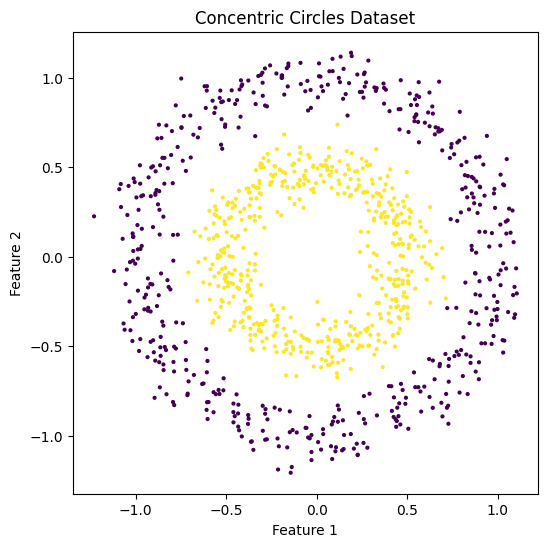

(1000, 2)

In [234]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import torch
from torch import nn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Generate data
X, y = make_circles(n_samples=1000, noise=0.09, factor=0.5, random_state = 42)
print(X[0,0])
# Visualize the data
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s = 4, cmap='viridis')
plt.title("Concentric Circles Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
X.shape


In [235]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
from helper_functions import plot_predictions
from helper_functions import plot_decision_boundary

helper_functions.py already exists, skipping download


In [236]:
X = torch.from_numpy(X).type(torch.float).to(device)
y = torch.from_numpy(y).type(torch.float).to(device)

In [237]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X,y, test_size =  0.2, random_state = 42)

X_train.device

device(type='cpu')

In [238]:
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
        self.relu = nn.ReLU()
        self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
        self.layer_3 = nn.Linear(in_features = 10, out_features = 1)


    def forward(self , x):
      return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [239]:
model = CircleModel().to(device)
model

CircleModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (relu): ReLU()
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [240]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.11)

In [241]:
def accuracy_predictor(y_true, y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  return (correct/len(y_true))*100


Epoch: 0 | Loss: 0.6934847235679626 | Test Loss: 0.6937079429626465 | Accuracy: 50.0
Epoch: 100 | Loss: 0.6829880475997925 | Test Loss: 0.6834686398506165 | Accuracy: 63.5
Epoch: 200 | Loss: 0.6572186946868896 | Test Loss: 0.6589651703834534 | Accuracy: 70.0
Epoch: 300 | Loss: 0.5874305367469788 | Test Loss: 0.5911657214164734 | Accuracy: 81.0
Epoch: 400 | Loss: 0.4320373833179474 | Test Loss: 0.44358229637145996 | Accuracy: 90.5
Epoch: 500 | Loss: 0.20485863089561462 | Test Loss: 0.23811832070350647 | Accuracy: 99.0
Epoch: 600 | Loss: 0.10175105184316635 | Test Loss: 0.1382727175951004 | Accuracy: 99.0
Epoch: 700 | Loss: 0.06121645122766495 | Test Loss: 0.09595836699008942 | Accuracy: 99.0
Epoch: 800 | Loss: 0.04221515357494354 | Test Loss: 0.0748712420463562 | Accuracy: 99.5
Epoch: 900 | Loss: 0.032160740345716476 | Test Loss: 0.062588170170784 | Accuracy: 99.5


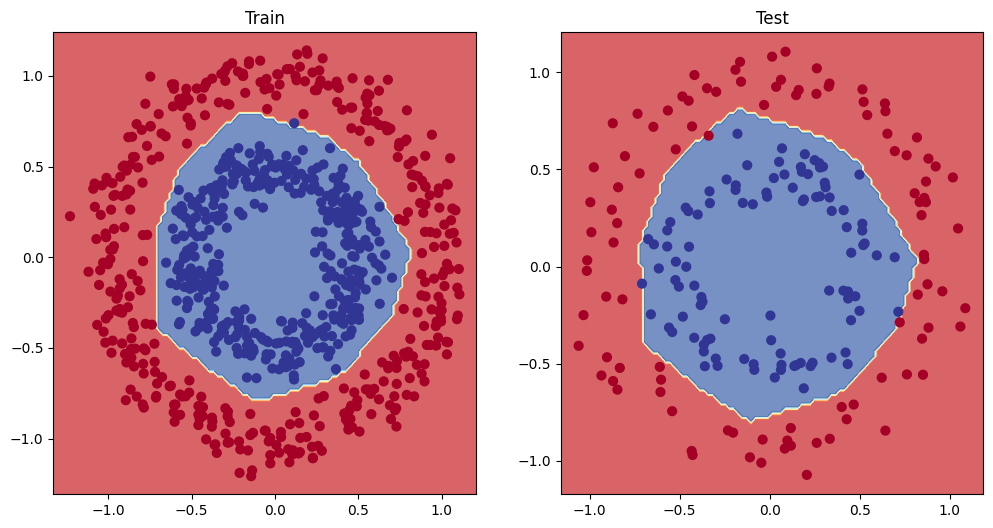

In [242]:

epochs = 1000
for epoch in range(epochs):
  model.train()

  y_logits = model(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    acc = accuracy_predictor(y_test, test_preds)
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss} | Accuracy: {acc}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

In [243]:
model_1 = nn.Sequential(
    nn.Linear(in_features = 1, out_features = 10),
    nn.ReLU(),
    nn.Linear(in_features = 10, out_features = 10),
    nn.ReLU(),
    nn.Linear(in_features = 10, out_features = 1)
)

weight = 0.7
bias = 0.4
start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * x + bias
a = int(0.8*len(x))
x_train, y_train = x[:a], y[:a]
x_test, y_test = x[a:], y[a:]

#plot_predictions(x_train, y_train, x_test, y_test)
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.05)

torch.manual_seed(42)
epochs = 1000

for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(x_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits.unsqueeze(dim=1), y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(x_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits.unsqueeze(dim=1), y_test)
    acc = accuracy_predictor(y_test, test_logits)
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss} | Accuracy: {acc}")

y_test[:10],test_logits[:10]


Epoch: 0 | Loss: 0.7968105673789978 | Test Loss: 1.0735872983932495 | Accuracy: 0.0
Epoch: 10 | Loss: 0.1312352865934372 | Test Loss: 0.3570607304573059 | Accuracy: 0.0
Epoch: 20 | Loss: 0.11435095965862274 | Test Loss: 0.294501930475235 | Accuracy: 0.0
Epoch: 30 | Loss: 0.10709284245967865 | Test Loss: 0.27696189284324646 | Accuracy: 0.0
Epoch: 40 | Loss: 0.09771327674388885 | Test Loss: 0.2582405209541321 | Accuracy: 0.0
Epoch: 50 | Loss: 0.08860868215560913 | Test Loss: 0.23613528907299042 | Accuracy: 0.0
Epoch: 60 | Loss: 0.07788413017988205 | Test Loss: 0.21073076128959656 | Accuracy: 0.0
Epoch: 70 | Loss: 0.06506042182445526 | Test Loss: 0.18042664229869843 | Accuracy: 0.0
Epoch: 80 | Loss: 0.04945095628499985 | Test Loss: 0.14336076378822327 | Accuracy: 0.0
Epoch: 90 | Loss: 0.035952359437942505 | Test Loss: 0.16053378582000732 | Accuracy: 0.0
Epoch: 100 | Loss: 0.07486014068126678 | Test Loss: 0.2215193808078766 | Accuracy: 0.0
Epoch: 110 | Loss: 0.0773388147354126 | Test Loss:

(tensor([[0.9600],
         [0.9740],
         [0.9880],
         [1.0020],
         [1.0160],
         [1.0300],
         [1.0440],
         [1.0580],
         [1.0720],
         [1.0860]]),
 tensor([0.9593, 0.9691, 0.9788, 0.9883, 0.9970, 1.0058, 1.0145, 1.0233, 1.0320,
         1.0408]))

Text(0, 0.5, 'Feature 2')

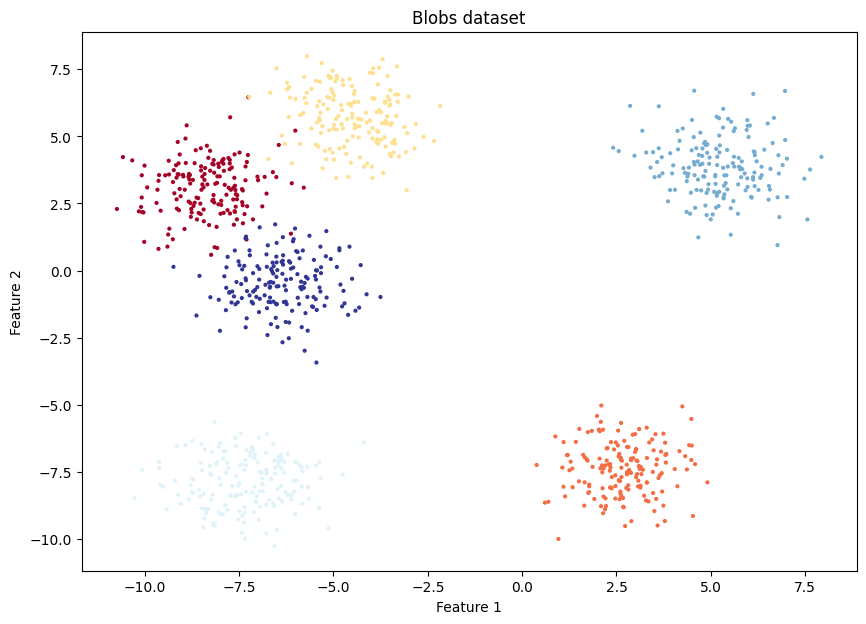

In [251]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X_blob , y_blob = make_blobs(n_samples = 1000, n_features = 2, centers = 6, cluster_std = 1.)



plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu, s =4)
plt.title("Blobs dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")



In [252]:
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.long)

X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob, test_size = 0.2, random_state = 42)
X_train

tensor([[-6.1038e+00,  3.9963e+00],
        [-8.0864e+00,  3.2675e+00],
        [-7.4283e+00, -9.7749e+00],
        ...,
        [-5.4367e+00,  4.4357e-03],
        [-7.1293e+00, -7.8507e-01],
        [-3.8381e+00,  4.8985e+00]])

In [258]:
model_2 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 32),

    nn.Linear(in_features = 32, out_features = 10),

    nn.Linear(in_features = 10, out_features = 6)
)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.1)

Epoch: 0, Loss : 2.93261, Test_Loss : 1.15545, Accuracy :  62.00
Epoch: 100, Loss : 0.07053, Test_Loss : 0.07897, Accuracy :  96.00
Epoch: 200, Loss : 0.05956, Test_Loss : 0.07061, Accuracy :  96.50
Epoch: 300, Loss : 0.05586, Test_Loss : 0.06828, Accuracy :  96.50
Epoch: 400, Loss : 0.05328, Test_Loss : 0.06657, Accuracy :  96.50
Epoch: 500, Loss : 0.05084, Test_Loss : 0.06477, Accuracy :  96.50
Epoch: 600, Loss : 0.04825, Test_Loss : 0.06271, Accuracy :  96.50
Epoch: 700, Loss : 0.04539, Test_Loss : 0.06032, Accuracy :  96.50
Epoch: 800, Loss : 0.04225, Test_Loss : 0.05762, Accuracy :  96.50
Epoch: 900, Loss : 0.03895, Test_Loss : 0.05468, Accuracy :  96.50


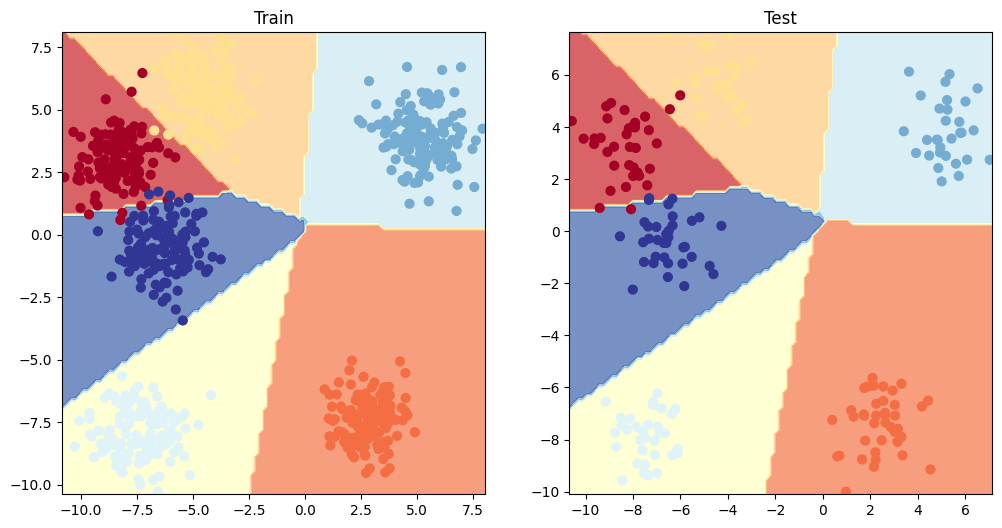

In [259]:
torch.manual_seed(42)
epochs = 1000

for epoch in range(epochs):
  model_2.train()

  y_logits = model_2(X_train)
  y_pred_probs = torch.softmax(y_logits, dim = 1)
  y_preds = torch.argmax(y_pred_probs, dim = 1)

  loss = loss_fn(y_logits, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_logits = model_2(X_test)
    x_pred_probs = torch.softmax(test_logits, dim = 1)
    test_preds = torch.argmax(x_pred_probs, dim = 1)
    test_loss = loss_fn(test_logits, y_test)
    acc = accuracy_predictor(y_test, test_preds)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch}, Loss : {loss:.5f}, Test_Loss : {test_loss:.5f}, Accuracy :  {acc:.2f}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)
